In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Eriona\Downloads\Midterm_53_group.csv.zip")

df.head()

,Time,Source,No.,Destination,Protocol,Length,Info
0,0.000000,192.167.8.166,1,192.167.255.255,NBNS,92,Name query NB WPAD<00>
1,0.784682,192.167.8.166,2,192.167.255.255,NBNS,92,Name query NB WPAD<00>
2,1.169060,VMware_8a:5c:e6,3,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
3,2.167949,VMware_8a:5c:e6,4,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
4,3.170095,VMware_8a:5c:e6,5,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


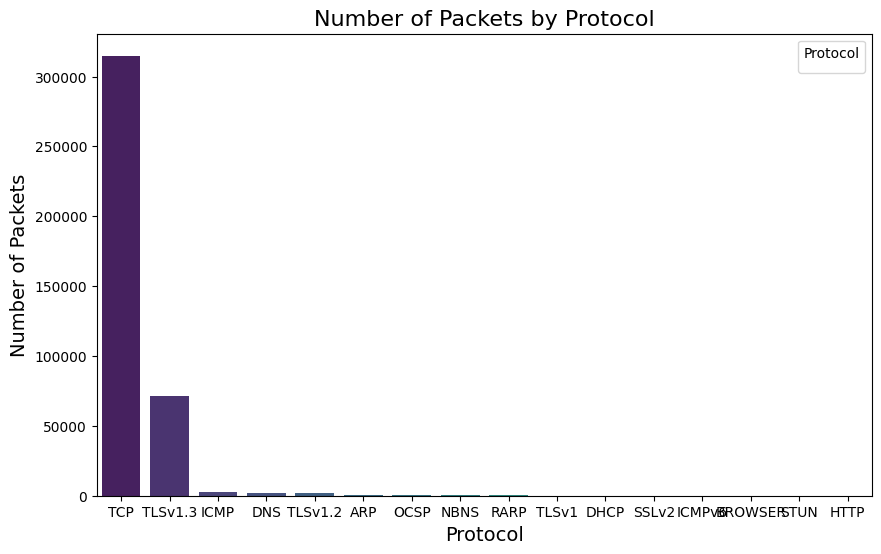

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting protocols
protocol_count = df['Protocol'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=protocol_count.index, y=protocol_count.values, hue=protocol_count.index, dodge=False, palette="viridis")
plt.title('Number of Packets by Protocol', fontsize=16)
plt.xlabel('Protocol', fontsize=14)
plt.ylabel('Number of Packets', fontsize=14)
plt.legend(title="Protocol")
plt.show()


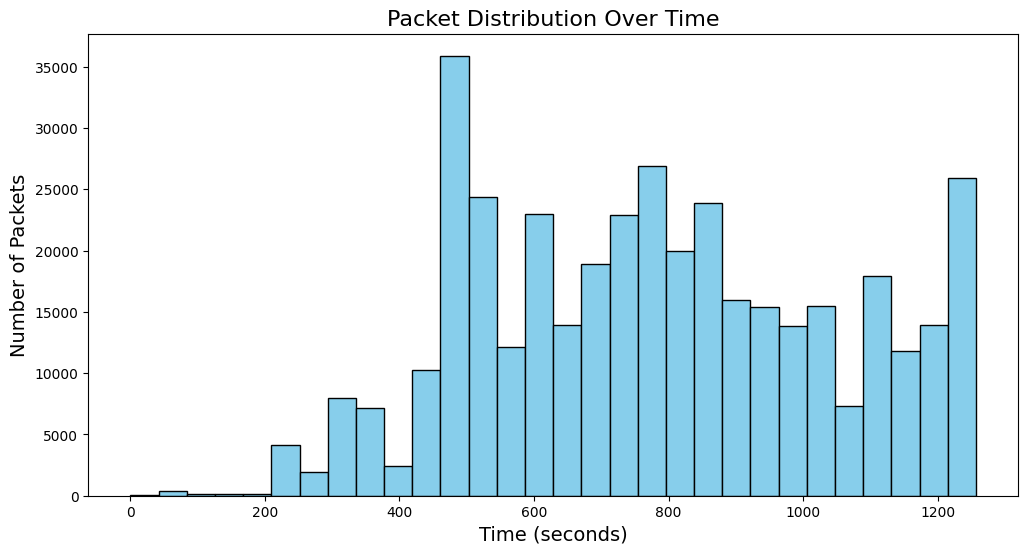

In [ ]:
# Convert Time column to numeric
df['Time'] = pd.to_numeric(df['Time'])

plt.figure(figsize=(12, 6))
plt.hist(df['Time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Packet Distribution Over Time', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Number of Packets', fontsize=14)
plt.show()


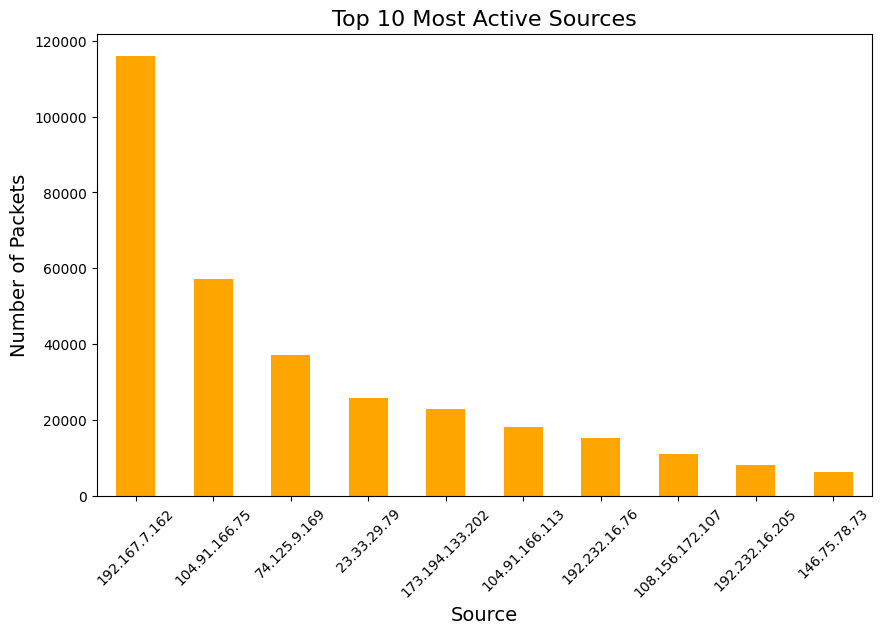

In [ ]:
# Counting the most active sources
source_count = df['Source'].value_counts()

plt.figure(figsize=(10, 6))
source_count.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Active Sources', fontsize=16)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Number of Packets', fontsize=14)
plt.xticks(rotation=45)
plt.show()


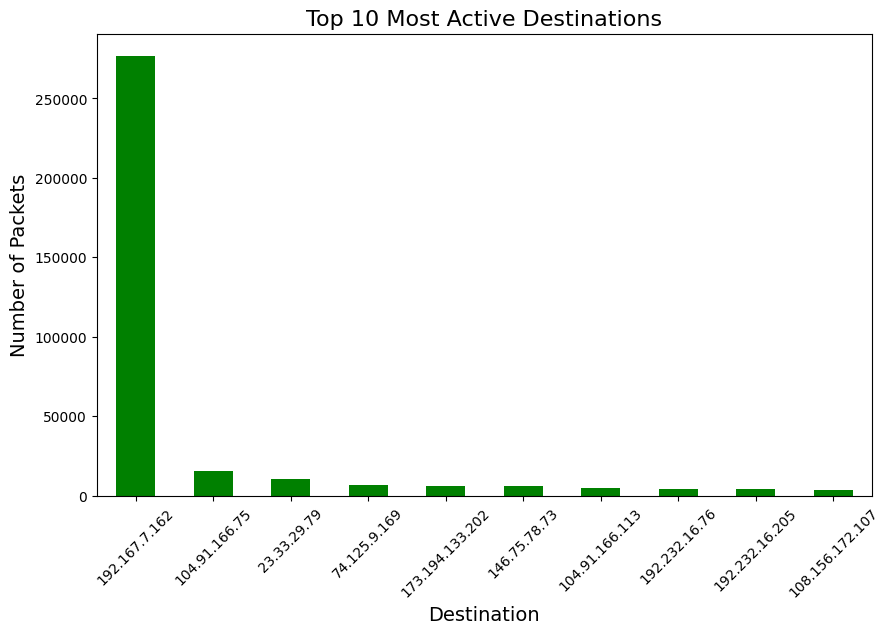

In [ ]:
# Counting the most active destinations
destination_count = df['Destination'].value_counts()


plt.figure(figsize=(10, 6))
destination_count.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Active Destinations', fontsize=16)
plt.xlabel('Destination', fontsize=14)
plt.ylabel('Number of Packets', fontsize=14)
plt.xticks(rotation=45)
plt.show()


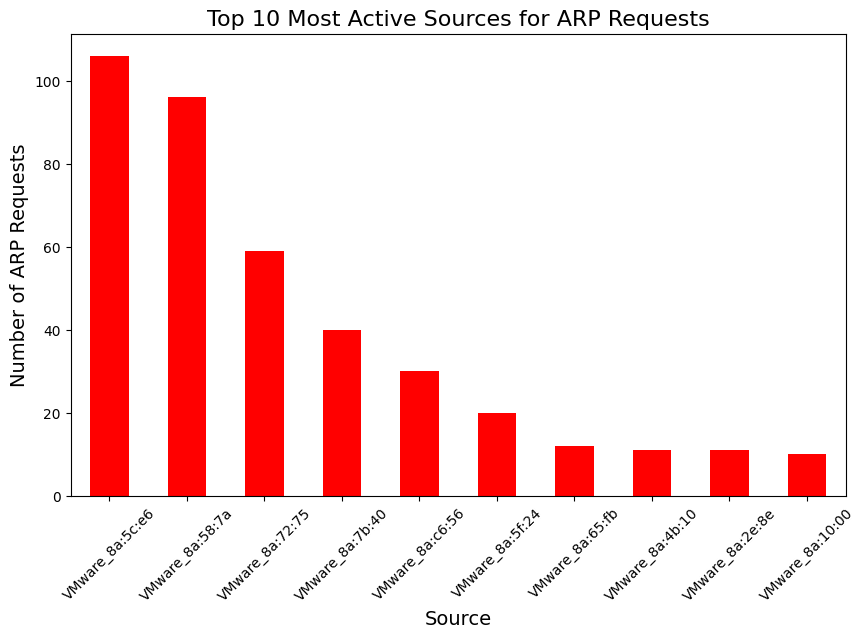

In [ ]:
# Filtering ARP packets
arp_requests = df[df['Protocol'] == 'ARP']


arp_sources = arp_requests['Source'].value_counts()


plt.figure(figsize=(10, 6))
arp_sources.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Most Active Sources for ARP Requests', fontsize=16)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Number of ARP Requests', fontsize=14)
plt.xticks(rotation=45)
plt.show()


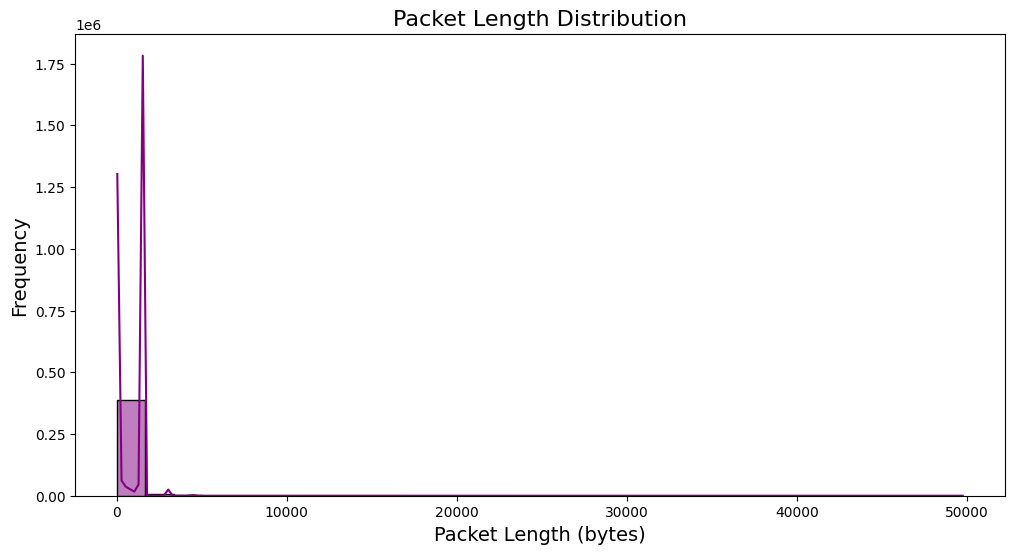

In [ ]:
# Convert Length column to numeric
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')


plt.figure(figsize=(12, 6))
sns.histplot(df['Length'], bins=30, kde=True, color='purple')
plt.title('Packet Length Distribution', fontsize=16)
plt.xlabel('Packet Length (bytes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


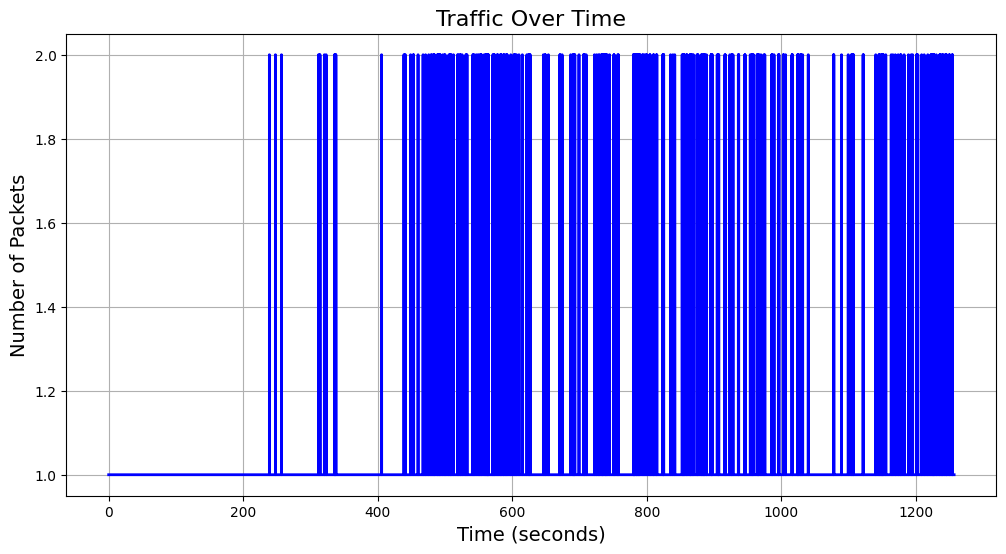

In [ ]:
# Aggregating packets over time
time_series = df.groupby('Time').size()


plt.figure(figsize=(12, 6))
time_series.plot(color='blue', linewidth=2)
plt.title('Traffic Over Time', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Number of Packets', fontsize=14)
plt.grid(True)
plt.show()


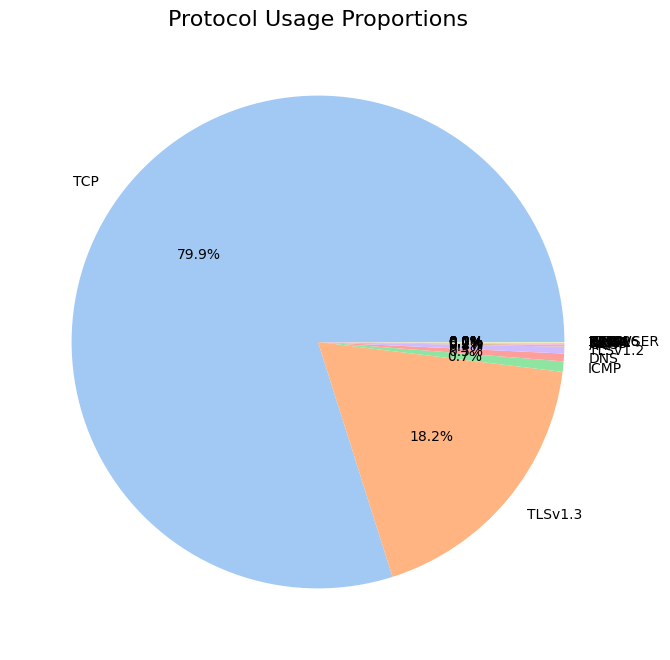

In [ ]:
# Calculating proportions of protocols
protocol_percentage = df['Protocol'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
protocol_percentage.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Protocol Usage Proportions', fontsize=16)
plt.ylabel('')
plt.show()


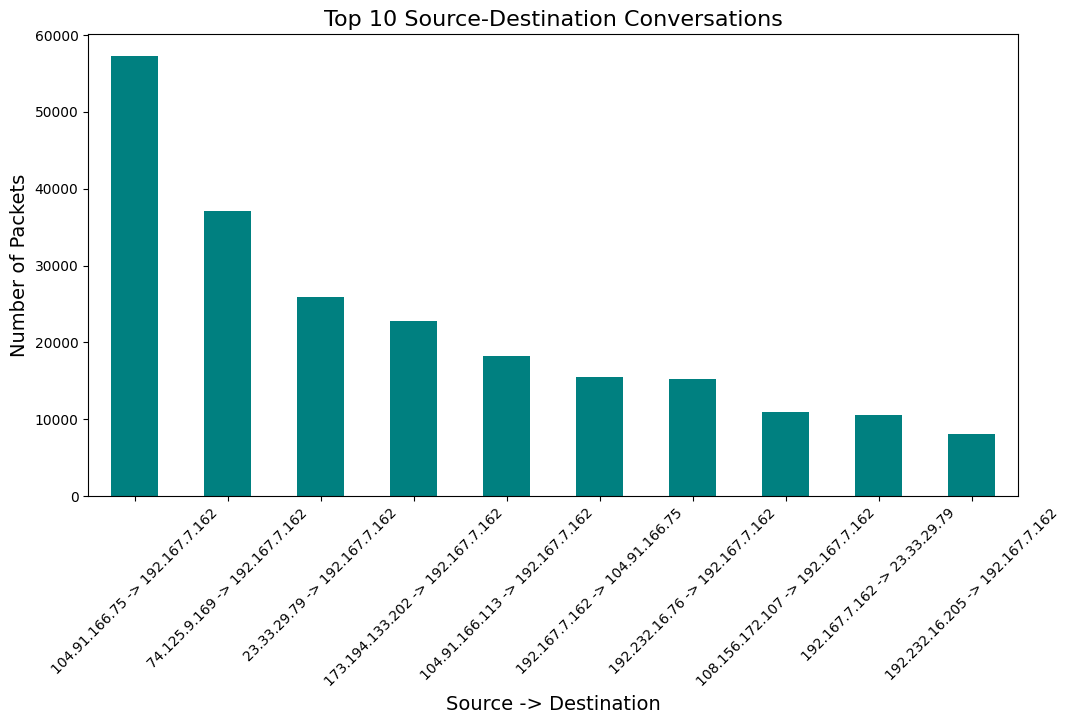

In [23]:
# Creating a Source-Destination pair column
df['Source-Destination'] = df['Source'] + ' -> ' + df['Destination']


top_conversations = df['Source-Destination'].value_counts().head(10)


plt.figure(figsize=(12, 6))
top_conversations.plot(kind='bar', color='teal')
plt.title('Top 10 Source-Destination Conversations', fontsize=16)
plt.xlabel('Source -> Destination', fontsize=14)
plt.ylabel('Number of Packets', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Identifying outliers in packet length
q1 = df['Length'].quantile(0.25)
q3 = df['Length'].quantile(0.75)
iqr = q3 - q1


outliers = df[(df['Length'] < (q1 - 1.5 * iqr)) | (df['Length'] > (q3 + 1.5 * iqr))]


print("Number of Outliers:", len(outliers))
print(outliers)


Number of Outliers: 1470
               Time         Source     No.    Destination Protocol  Length  \
13588    321.963679  192.167.7.162   13589  142.251.32.14      TCP    4290   
13590    321.963697  192.167.7.162   13591  142.251.32.14  TLSv1.3    4290   
54059    486.149719  192.167.7.162   54060   146.75.78.73      TCP    4434   
54060    486.149726  192.167.7.162   54061   146.75.78.73      TCP    4434   
62478    495.713489  192.167.7.162   62479   146.75.78.73      TCP    4434   
...             ...            ...     ...            ...      ...     ...   
390957  1248.507354  192.167.7.162  390958   146.75.78.73  TLSv1.3    4434   
390958  1248.507383  192.167.7.162  390959   146.75.78.73      TCP    4434   
390959  1248.507418  192.167.7.162  390960   146.75.78.73      TCP    4434   
391967  1250.252151  192.167.7.162  391968   146.75.78.73      TCP    4434   
391968  1250.252158  192.167.7.162  391969   146.75.78.73      TCP    4434   

                                      

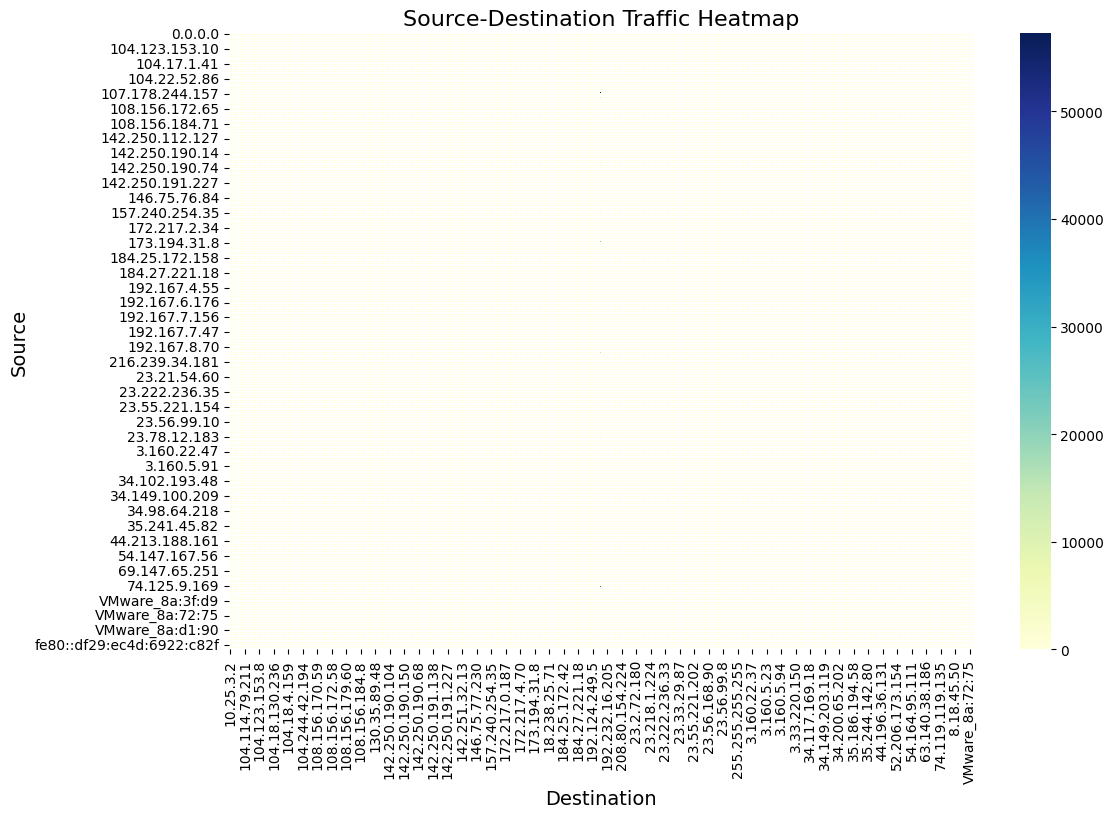

In [ ]:
# pivot table for source and destination traffic
traffic_matrix = df.pivot_table(index='Source', columns='Destination', values='Length', aggfunc='count', fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(traffic_matrix, cmap='YlGnBu', linecolor='white', linewidths=0.5)
plt.title('Source-Destination Traffic Heatmap', fontsize=16)
plt.xlabel('Destination', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.show()
